In [20]:
import numpy as np
import pandas as pd
import statistics as stat

df = pd.read_csv('../../data/round0/prices_round_0_day_-2.csv', delimiter=';')
df.fillna(0, inplace=True)

dfna = pd.read_csv('../../data/round0/prices_round_0_day_-2.csv', delimiter=';')

In [24]:
dfna['spread'] = df['ask_price_1'] - df['bid_price_1']

def vwap(row):
    return stat.fmean([row[f'ask_price_{i}'] for i in range(1, 4)], weights=[row[f'ask_volume_{i}'] for i in range(1, 4)])

def vwbp(row):
    return stat.fmean([row[f'bid_price_{i}'] for i in range(1, 4)], weights=[row[f'bid_volume_{i}'] for i in range(1, 4)])

def vwmp(row):
    return (vwap(row) + vwbp(row)) / 2

def biggest_mid_price(row):
    ask_vols = [row[f'ask_volume_{i}'] for i in range(1, 4)]
    mid = [row[f'ask_price_{i}'] for i in range(1, 4)][ask_vols.index(max(ask_vols))]
    bid_vols = [row[f'bid_volume_{i}'] for i in range(1, 4)]
    mid += [row[f'bid_price_{i}'] for i in range(1, 4)][bid_vols.index(max(bid_vols))]
    return mid / 2

def outer_mid_price(row):
    asks = [row['ask_price_3'], row['ask_price_2'], row['ask_price_1']]
    bids = [row['bid_price_3'], row['bid_price_2'], row['bid_price_1']]

    mid = 0

    for ask in asks:
        if not np.isnan(ask):
            mid += ask
            break

    for bid in bids:
        if not np.isnan(bid):
            mid += bid
            break

    return mid / 2

dfna['mid_price'] = df.apply(vwmp, axis=1)
dfna['vwap'] = df.apply(vwap, axis=1)
dfna['vwbp'] = df.apply(vwbp, axis=1)
dfna['vol'] = df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3'] - (df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3'])
dfna['omp'] = dfna.apply(outer_mid_price, axis=1)
dfna['bmp'] = dfna.apply(biggest_mid_price, axis=1)

df = dfna

df.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_3,mid_price,profit_and_loss,spread,vwap,vwbp,vol,omp,ref_price,bmp
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,10000.0,10004.000000,10000.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,5000.0,5003.000000,5000.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,...,NaN,NaN,-4.000000,8.0,NaN,NaN,NaN,10000.0,10000.000000,10000.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,...,NaN,NaN,-2.925293,6.0,NaN,NaN,NaN,5000.5,5000.074707,5000.5
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,...,NaN,NaN,-3.134766,6.0,NaN,NaN,NaN,4999.5,4999.865234,4999.5


In [25]:
%matplotlib notebook

buy_price = {
    'AMETHYSTS': 10004,
    'STARFRUIT': 5003
}

df.loc[df['product'] == 'AMETHYSTS', 'ref_price'] = df[df['product'] == 'AMETHYSTS']['profit_and_loss'] + buy_price['AMETHYSTS']
df.loc[df['product'] == 'STARFRUIT', 'ref_price'] = df[df['product'] == 'STARFRUIT']['profit_and_loss'] + buy_price['STARFRUIT']
df = df.iloc[2:]

df[df['product'] == 'AMETHYSTS'].plot(y=['bmp', 'omp','ref_price'], style='-')
df[df['product'] == 'STARFRUIT'].plot(y=['bmp', 'omp','ref_price'], style='-')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

count    1990.000000
mean       -0.069590
std         0.338106
min        -1.000000
25%        -0.287980
50%        -0.025882
75%         0.130100
max         1.000000
Name: rsi, dtype: float64


/var/folders/mf/f3gnw9hj01q67wmsz9fyz0w40000gn/T/ipykernel_2195/985233797.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['product'] == 'STARFRUIT', 'ema'] = df[df['product'] == 'STARFRUIT']['mid_price'].ewm(span=15, adjust=False).mean()
/var/folders/mf/f3gnw9hj01q67wmsz9fyz0w40000gn/T/ipykernel_2195/985233797.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['product'] == 'STARFRUIT', 'std'] = np.abs(df[df['product'] == 'STARFRUIT']['mid_price'].rolling(100).std())
/var/folders/

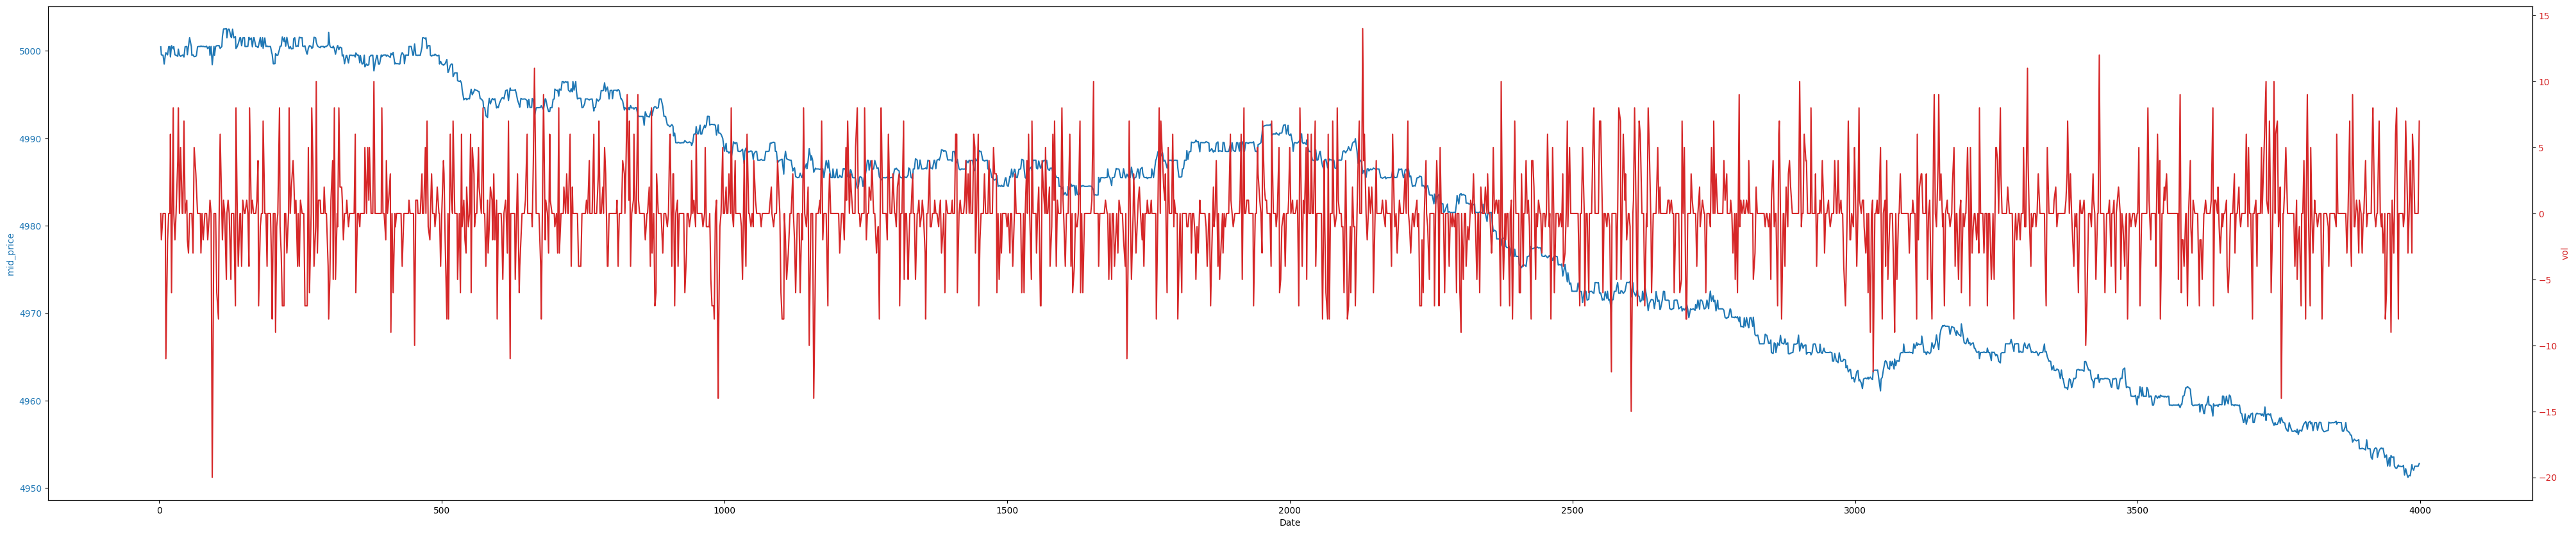

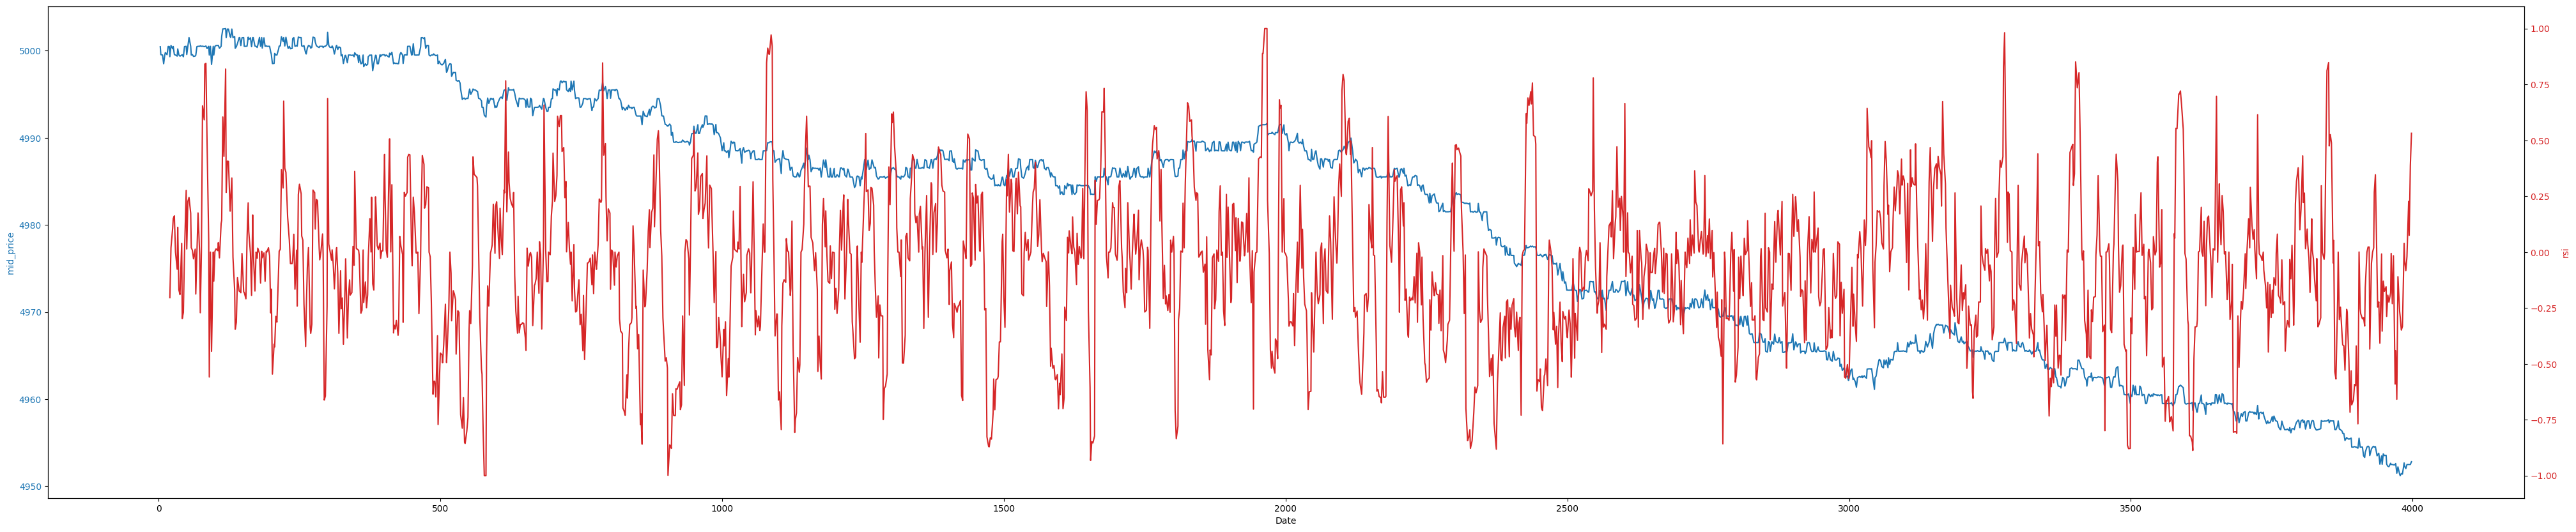

In [4]:
import matplotlib.pyplot as plt

def plot_dual_axis(df, col, col1):
    fig, ax1 = plt.subplots(figsize=(50, 10))

    color1 = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(col, color=color1)
    ax1.plot(df.index, df[col], color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel(col1, color=color2)
    ax2.plot(df.index, df[col1], color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.show()


def calculate_rsi(data, column_name, period=10):
    # Calculate daily price changes
    delta = data[column_name].diff(1)

    # Calculate gain (positive price changes) and loss (negative price changes)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate average gain and average loss over the specified period
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    # Calculate relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Add RSI to the DataFrame
    return rsi / 50 - 1

df.loc[df['product'] == 'STARFRUIT', 'ema'] = df[df['product'] == 'STARFRUIT']['mid_price'].ewm(span=15, adjust=False).mean()
df.loc[df['product'] == 'STARFRUIT', 'std'] = np.abs(df[df['product'] == 'STARFRUIT']['mid_price'].rolling(100).std())
df.loc[df['product'] == 'STARFRUIT', 'rsi'] = calculate_rsi(df[df['product'] == 'STARFRUIT'], 'mid_price')

print(df[df['product'] == 'STARFRUIT']['rsi'].describe())

plot_dual_axis(df[df['product'] == 'STARFRUIT'], 'mid_price', 'vol')
plot_dual_axis(df[df['product'] == 'STARFRUIT'], 'mid_price', 'rsi')

In [16]:
for i in range(1,21):
    df.loc[df['product'] == 'STARFRUIT', "omp.L"+str(i)] = df[df['product'] == 'STARFRUIT']["omp"].shift(i)
    df.loc[df['product'] == 'STARFRUIT', "vwap.L"+str(i)] = df[df['product'] == 'STARFRUIT']["vwap"].shift(i)
    df.loc[df['product'] == 'STARFRUIT', "vwbp.L"+str(i)] = df[df['product'] == 'STARFRUIT']["vwbp"].shift(i)

    df.loc[df['product'] == 'AMETHYSTS', "omp.L"+str(i)] = df[df['product'] == 'AMETHYSTS']["omp"].shift(i)
    df.loc[df['product'] == 'AMETHYSTS', "vwap.L"+str(i)] = df[df['product'] == 'AMETHYSTS']["vwap"].shift(i)
    df.loc[df['product'] == 'AMETHYSTS', "vwbp.L"+str(i)] = df[df['product'] == 'AMETHYSTS']["vwbp"].shift(i)


In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

i = 3
feat = ['omp.L'+str(k) for k in range(1, i + 1)] + ['omp']
#feat = ['vwap.L'+str(k) for k in range(1, i + 1)] + ['vwbp','vwap'] +  ['vwbp.L'+str(k) for k in range(1, i + 1)]
x = df[feat]
y = df['ref_price']
#x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop').fit()
df['pred_mid_price'] = model.predict(x)
df.loc[df['product'] == 'STARFRUIT', 'buy'] = np.where(df[df['product'] == 'STARFRUIT']['pred_mid_price'] >= df[df['product'] == 'STARFRUIT']['ask_price_1'], df[df['product'] == 'STARFRUIT']['ask_price_1'], np.nan)
df.loc[df['product'] == 'STARFRUIT', 'sell'] = np.where(df[df['product'] == 'STARFRUIT']['pred_mid_price'] <= df[df['product'] == 'STARFRUIT']['bid_price_1'], df[df['product'] == 'STARFRUIT']['bid_price_1'], np.nan)

print(i, model.summary())
print(model.params)

df[df['product'] == 'STARFRUIT'].plot(y=['ask_price_1', 'bid_price_1', 'ask_price_2', 'bid_price_2', 'ask_price_3', 'bid_price_3', 'pred_mid_price','ref_price', 'buy', 'sell'], style=['-','-','-','-','-','-','-','-', 'go', 'ro'],figsize=(100,10))
plt.show()
(df[df['product'] == 'STARFRUIT']['pred_mid_price'] - df[df['product'] == 'STARFRUIT']['ref_price']).plot(figsize=(30,10))
plt.show()

residuals = df[df['product'] == 'STARFRUIT']['pred_mid_price'] - df[df['product'] == 'STARFRUIT']['ref_price']

sns.displot(residuals)
plt.show()
print(residuals.describe())

data = residuals.dropna()
mu, std = norm.fit(data)
# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

3                                  OLS Regression Results                                
Dep. Variable:              ref_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.004e+12
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:26:18   Log-Likelihood:                          1267.2
No. Observations:                3988   AIC:                                     -2526.
Df Residuals:                    3984   BIC:                                     -2501.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    1994.000000
mean        0.006959
std         0.241192
min        -0.748169
25%        -0.164546
50%         0.005204
75%         0.180150
max         0.656785
dtype: float64


/var/folders/mf/f3gnw9hj01q67wmsz9fyz0w40000gn/T/ipykernel_2195/3310456444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_mid_price'] = 10000
/var/folders/mf/f3gnw9hj01q67wmsz9fyz0w40000gn/T/ipykernel_2195/3310456444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy'] = np.where(10001 >= df['ask_price_1'], df['ask_price_1'], np.nan)
/var/folders/mf/f3gnw9hj01q67wmsz9fyz0w40000gn/T/ipykernel_2195/3310456444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<Axes: >

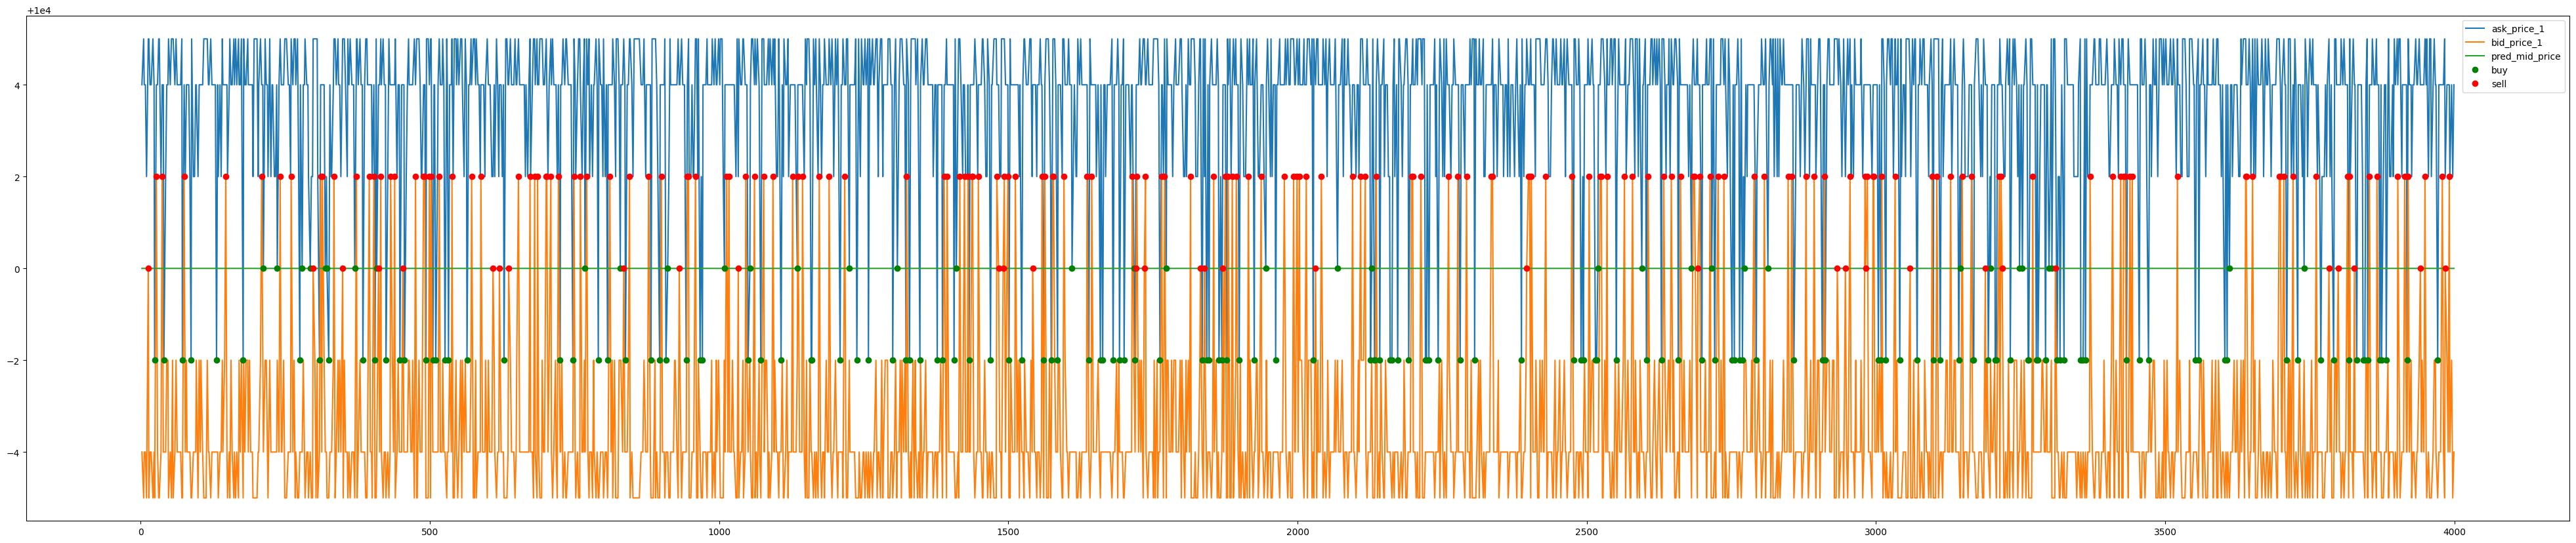

In [7]:
df['pred_mid_price'] = 10000
df['buy'] = np.where(10001 >= df['ask_price_1'], df['ask_price_1'], np.nan)
df['sell'] = np.where(10000 <= df['bid_price_1'], df['bid_price_1'], np.nan)

df[df['product'] == 'AMETHYSTS'].plot(y=['ask_price_1', 'bid_price_1' ,'pred_mid_price', 'buy', 'sell'], style=['-','-','-', 'go', 'ro'],figsize=(50,10))

In [29]:
trades_max = pd.read_json('../data/max.log')
trades_one = pd.read_json('../data/one.log')

AMETHYSTS


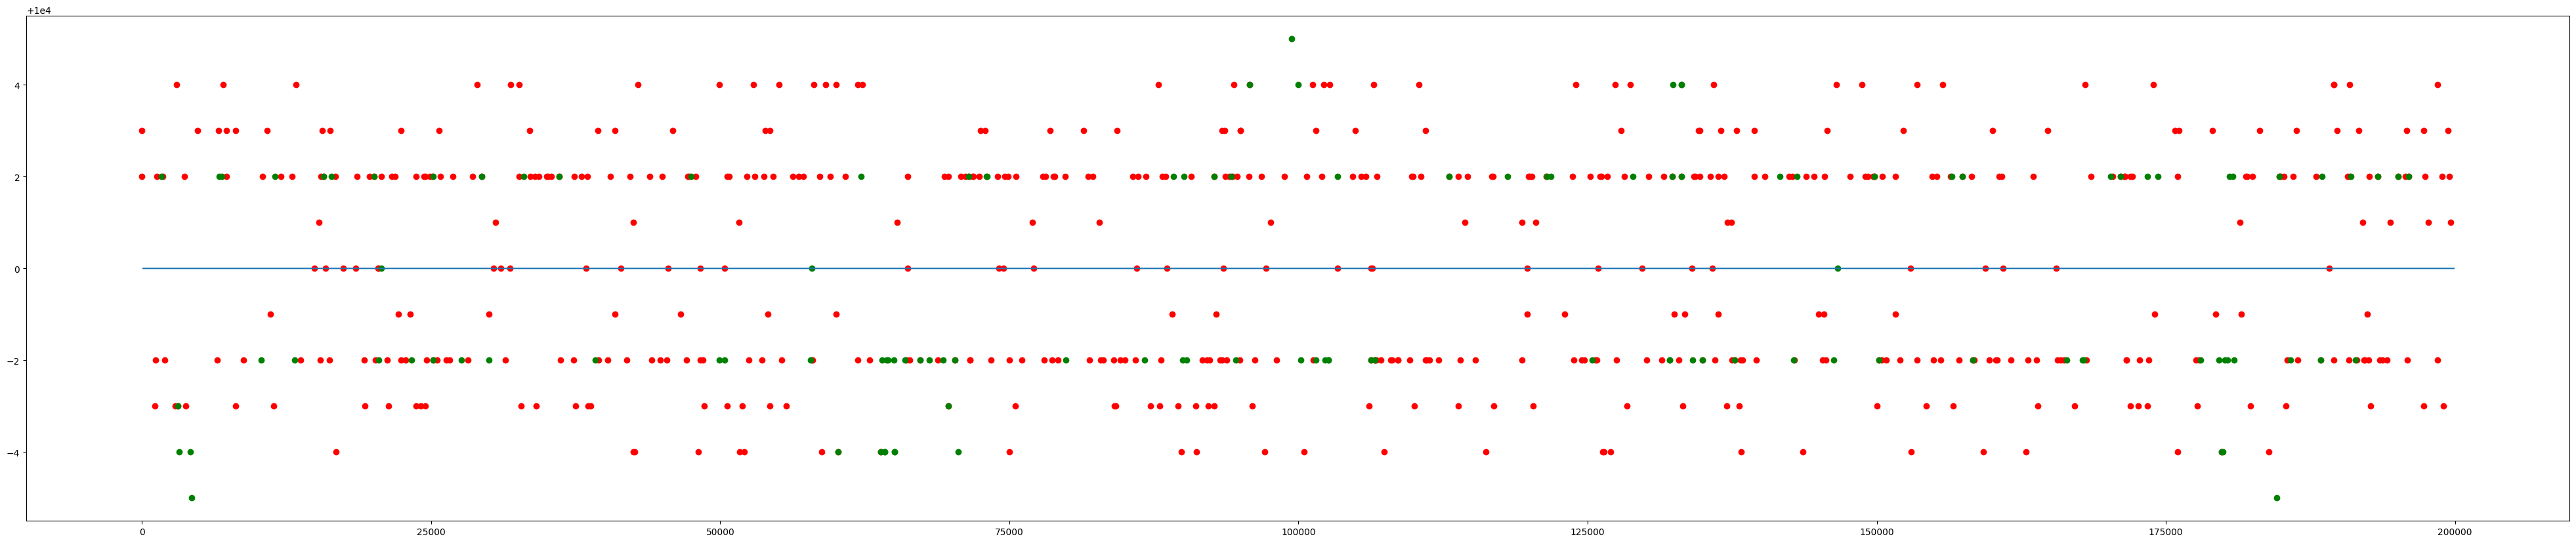

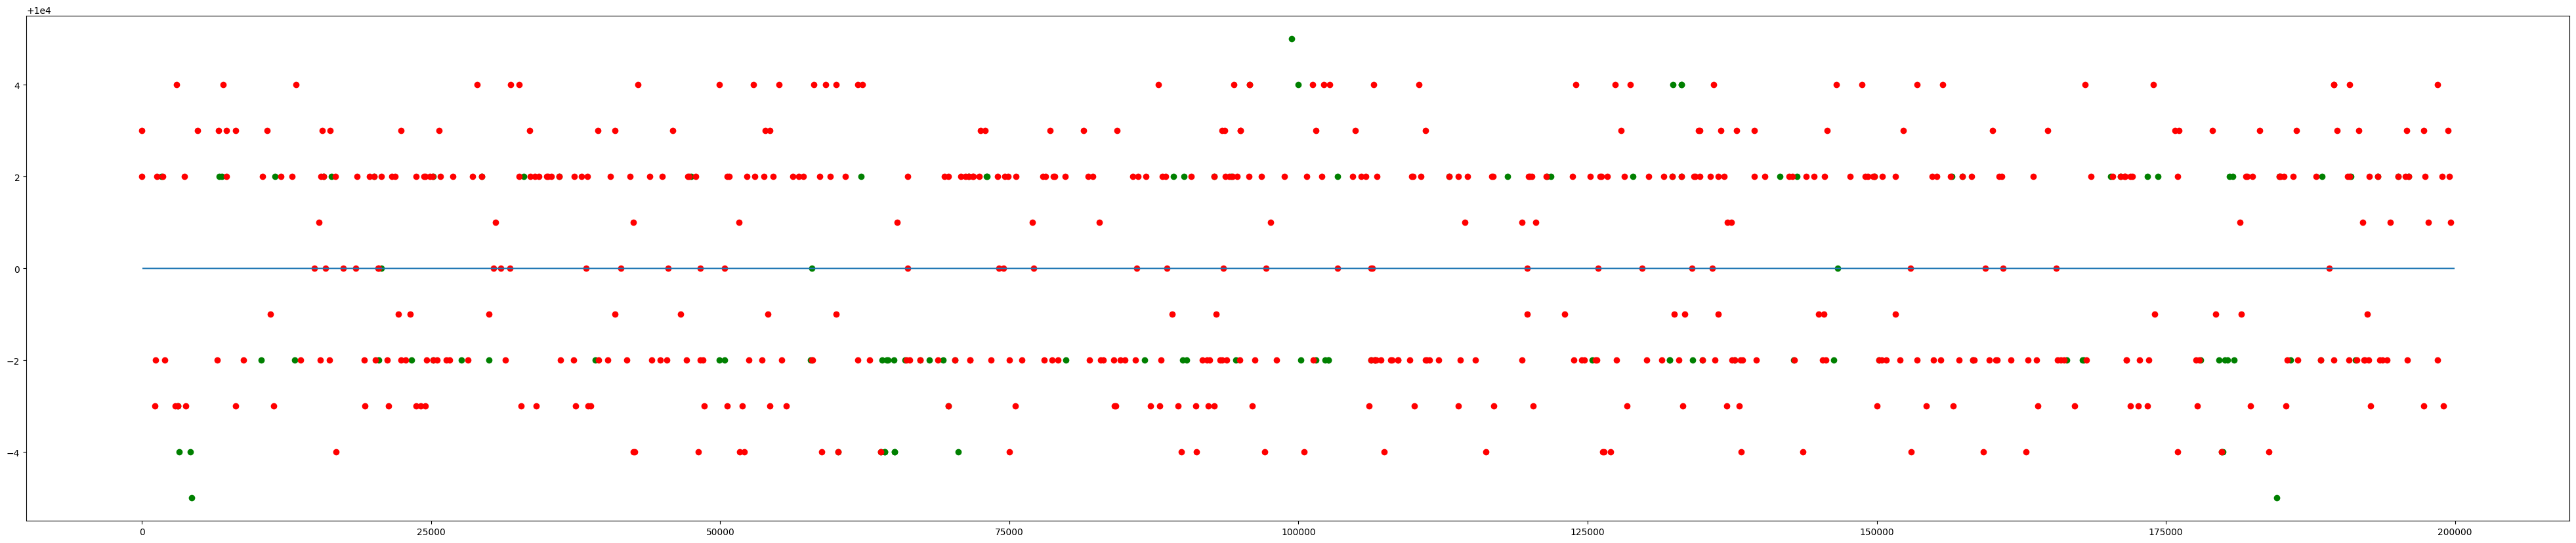

STARFRUIT


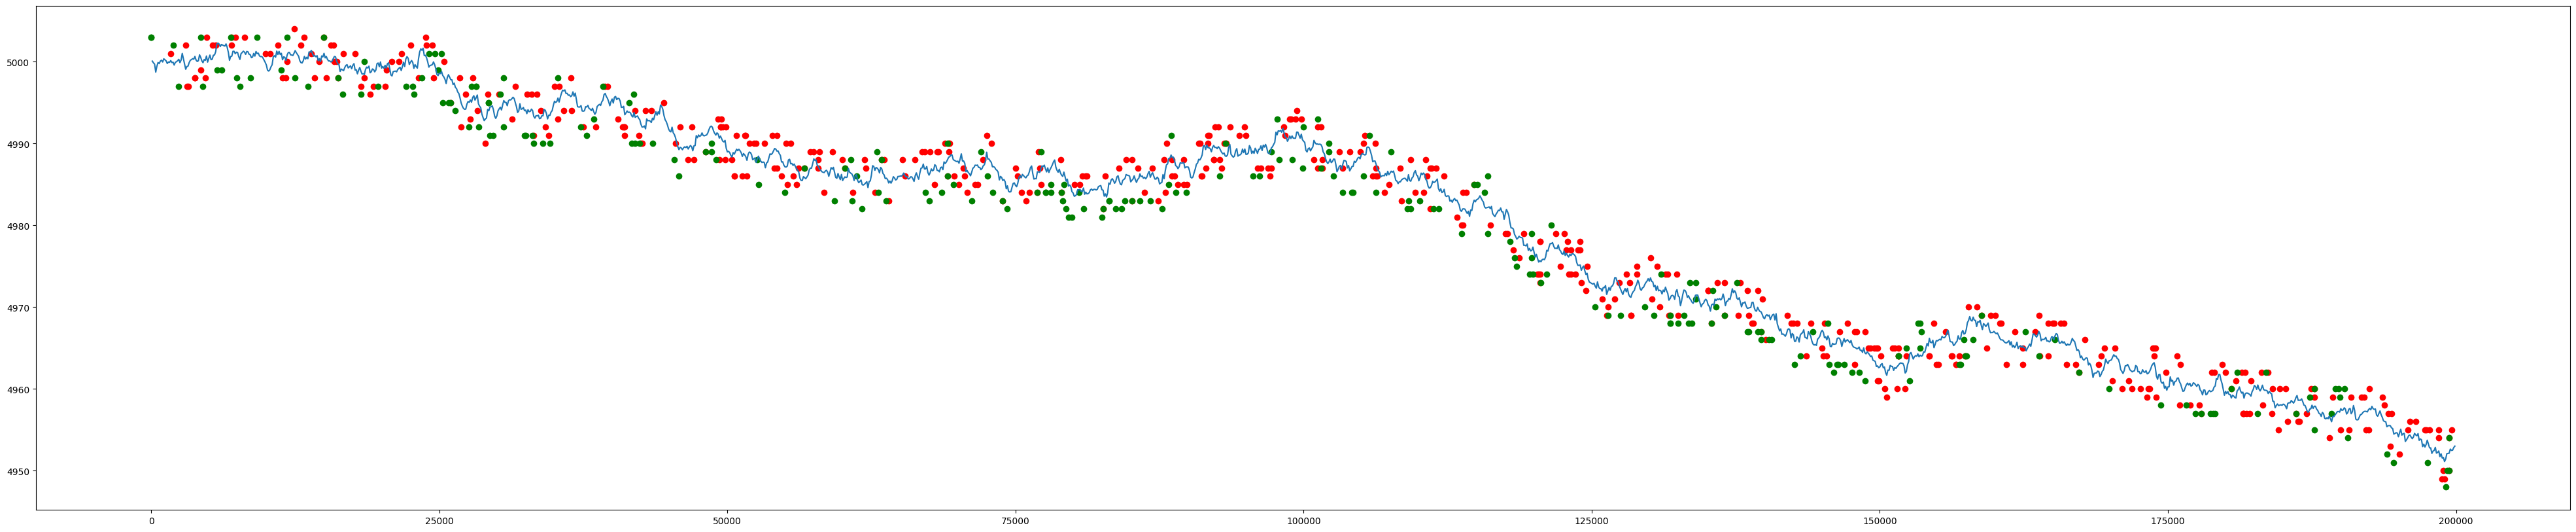

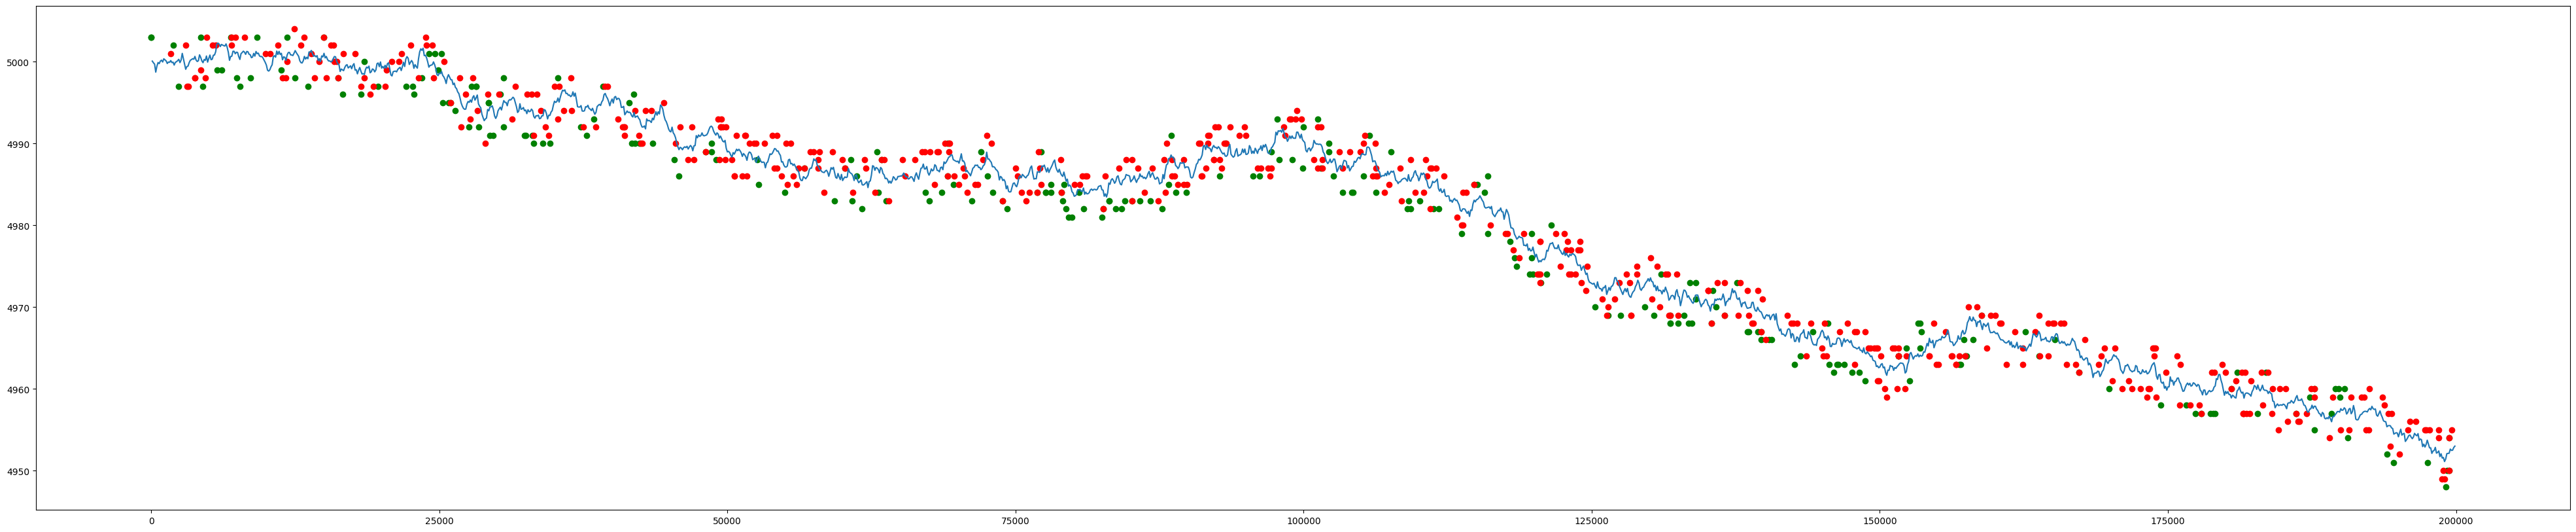

In [36]:
def plot_trades(product):
    ds1 = df[df['product'] == product]
    ds2 = trades_max[(trades_max['symbol'] == product) & ((trades_max['buyer'] == 'SUBMISSION') | (trades_max['seller'] == 'SUBMISSION'))]
    ds3 = trades_max[(trades_max['symbol'] == product) & ((trades_max['buyer'] != 'SUBMISSION') & (trades_max['seller'] != 'SUBMISSION'))]
    #ds3 = trades[(trades['symbol'] == 'STARFRUIT') & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]

    print(product)
    _, ax = plt.subplots(figsize=(50, 10))
    ax.plot(ds1.timestamp, ds1.ref_price)
    ax.scatter(ds2.timestamp, ds2.price, color='red')
    ax.scatter(ds3.timestamp, ds3.price, color='green')
    
    plt.show()
    _, ax = plt.subplots(figsize=(50, 10))
    ax.plot(ds1.timestamp, ds1.ref_price)
    ax.scatter(ds3.timestamp, ds3.price, color='green')
    ax.scatter(ds2.timestamp, ds2.price, color='red')
    plt.show()

plot_trades('AMETHYSTS')
plot_trades('STARFRUIT')